# 1. IMPORTS

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt

# 2. LOAD DATA

In [2]:
# Create artificial data to make regression
X, y = datasets.make_regression(n_samples=150, n_features=4, random_state=0)

# Train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

# 3. TRAIN DATA

## 3.1 No Fine Tunning

In [3]:
# Define
model1 = tree.DecisionTreeRegressor(random_state=0, max_depth=15)

# Train
model1.fit(X_train, y_train)

# Performance
yhat = model1.predict(X_test)

# Results
mse = metrics.mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)

print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

MSE: 2922.8925029152906
RMSE: 54.063781803674175


In [4]:
# How the tree splitted
#plt.figure(figsize=(19, 13))
#tree.plot_tree(model1, filled=True, rounded=True)

# Save plot
#plt.savefig('reg_tree', dpi=1000);

# 3.2 With Fine Tunning

In [5]:
# Create artificial data
X, y = datasets.make_regression(n_samples=1000, n_features=3, random_state=1)

# Train/Test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Train/Validation split
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2)

In [6]:
# Create a range of values to be tested on the parameter max depth
values = list(range(1, 20))

# Create an empty list to receive the error for each value of 1
rmse_values = []

for i in values:

    # Define
    model2 = tree.DecisionTreeRegressor(max_depth=i, random_state=1)

    # Train
    model2.fit(X_train, y_train)

    # Perforance
    yhat = model2.predict(X_val)
    mse = metrics.mean_squared_error(y_val, yhat)
    rmse = np.sqrt(mse)

    rmse_values.append(rmse)

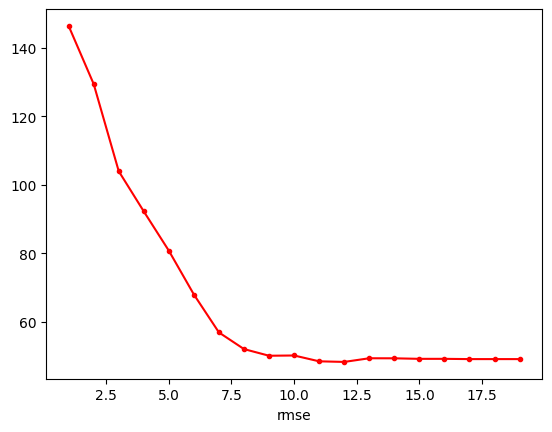

In [7]:
# Plot the result
plt.plot(values, rmse_values, marker='.', c='r')
plt.xlabel('max depth')
plt.xlabel('rmse')
plt.show()

In [8]:
# value for minimum error
min_ = min(rmse_values)
print(f'The value that brings the minimum error is: {rmse_values.index(min_)+1}, and the value is: {round(min_, 2)}')

The value that brings the minimum error is: 12, and the value is: 48.32


In [9]:
# Concat train and validation
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

In [10]:
# Create model with best value for max depth
model2_prod = tree.DecisionTreeRegressor(max_depth=12, random_state=0)

# Train
model2_prod.fit(X_train, y_train)

# Performance 
yhat_test = model2_prod.predict(X_test)
mse = metrics.mean_squared_error(y_test, yhat_test)
rmse = np.sqrt(mse)

print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

MSE: 2441.8629561530365
RMSE: 49.41520976534488


# 3.3 Changing several parameters

In [79]:
# Create artificial data
X, y = datasets.make_regression(n_samples=44025, n_features=3, random_state=1, noise=6.25, bias=3)

# Train/Test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Train/Validation split
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2)

In [80]:
# Create a range of values to be tested on the parameter max depth
values = list(range(1, 20))

# Create an empty list to receive the error for each value of 1
rmse_values = []

for i in values:

    # Define
    model3 = tree.DecisionTreeRegressor(max_depth=i, random_state=1)

    # Train
    model3.fit(X_train, y_train)

    # Perforance
    yhat = model3.predict(X_val)
    mse = metrics.mean_squared_error(y_val, yhat)
    rmse = np.sqrt(mse)

    rmse_values.append(rmse)

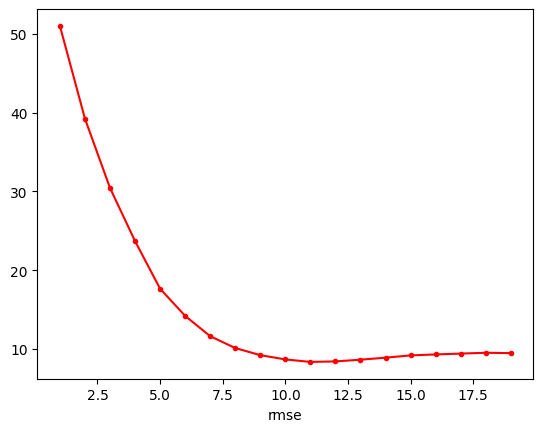

In [81]:
# Plot the result
plt.plot(values, rmse_values, marker='.', c='r')
plt.xlabel('max depth')
plt.xlabel('rmse')
plt.show()

In [82]:
# value for minimum error
min_ = min(rmse_values)
list_index = rmse_values.index(min_)+1
print(f'The value that brings the minimum error is: {list_index}, and the value is: {round(min_, 2)}')

The value that brings the minimum error is: 11, and the value is: 8.36


In [83]:
# Concat train and validation
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

In [101]:
# Create model with best value for max depth
model3_prod = tree.DecisionTreeRegressor(random_state=0, max_depth=list_index,)

# Train
model3_prod.fit(X_train, y_train)

# Performance 
yhat_test = model3_prod.predict(X_test)
mse = metrics.mean_squared_error(y_test, yhat_test)
rmse = np.sqrt(mse)

print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

MSE: 84.82957051007237
RMSE: 9.210296982729297
